In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

### **1. Read data**

In [176]:
df = pd.read_csv('../../data/processed/canomical_data.csv')
df.head()

,p_categories,p_brand,p_day_created,p_sold_quantity,p_original_price,p_discount_rate
0,7,155,659.0,702,528000,49
1,84,198,974.0,12844,799000,46
2,84,192,1372.0,938,209000,0
3,7,155,593.0,10359,473000,50
4,15,145,529.0,2338,106000,16


### **2. Train test split**
&#9889; This cell we choose columns X and y to split train test. Test set with size 20% and Train set with size 80% 

In [177]:
X = df.drop('p_sold_quantity', axis='columns')
y = testLabels = df.p_sold_quantity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

#### Make polynomial regression by pipeline 
&#9889; **NOTE:** We use pipeline to make polynomial regression. We can use pipeline to make many steps in one cell. Inside `Polynomial regression` used to make polynomial regression. We can change degree of polynomial regression by change `degree` in `PolynomialFeatures`

In [178]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression(**kwargs))

#### Create paramater grid to use GridSearchCV

In [179]:
param_grid = {
   'polynomialfeatures__degree': [3,4,5], 
   'linearregression__fit_intercept': [True, False], 
   'linearregression__normalize': [True, False]
}

In [180]:
gr_search = GridSearchCV(PolynomialRegression(), 
                         param_grid, 
                         cv=10, 
                         scoring='neg_mean_squared_error', 
                         verbose=3) 

#### Fit grid search to find best score and best param 

In [181]:
gr_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=3;, score=-1920162.174 total time=   0.0s
[CV 2/10] END linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=3;, score=-5715454.305 total time=   0.0s
[CV 3/10] END linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=3;, score=-1253688.352 total time=   0.0s
[CV 4/10] END linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=3;, score=-904251.798 total time=   0.0s
[CV 5/10] END linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=3;, score=-2413135106017776369664.000 total time=   0.0s
[CV 6/10] END linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=3;, score=-3336708.733 total time= 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': [3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=3)

In [182]:
print('Best Score: %s' % gr_search.best_score_)
print('Best Hyperparameters: %s' % gr_search.best_params_)

Best Score: -2.4131351060177964e+20
Best Hyperparameters: {'linearregression__fit_intercept': False, 'linearregression__normalize': True, 'polynomialfeatures__degree': 3}


### **3. Train model**

In [183]:
linear_fit_intercept, linear_normalize = gr_search.best_params_.get('linearregression__fit_intercept'), gr_search.best_params_.get('linearregression__normalize')
poly_grid = PolynomialRegression(degree=3, fit_intercept=linear_fit_intercept, normalize=linear_normalize)
poly_grid.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression',
                 LinearRegression(fit_intercept=False, normalize=True))])

### **4. Predict with model**

In [184]:
y_pred = poly_grid.predict(X_test)

#### **<font color='green'>Visualize Predict and Error values</font>**

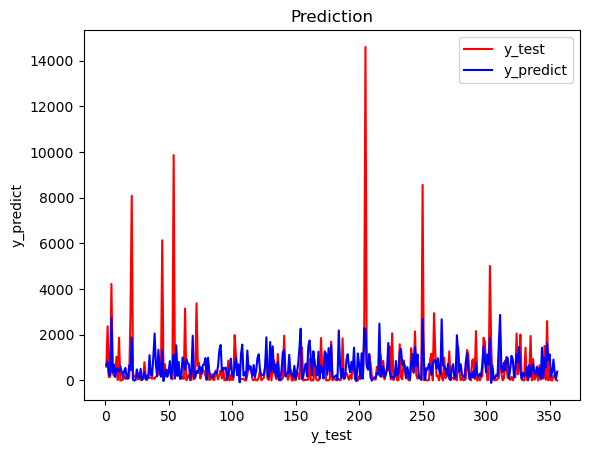

In [185]:
plot_predict = [i for i in range (1, len(y_test) + 1, 1)]
plt.plot(plot_predict,y_test,color='r',linestyle='-')
plt.plot(plot_predict,y_pred,color='b',linestyle='-')
plt.legend(['y_test','y_predict'])
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.title('Prediction')
plt.show()

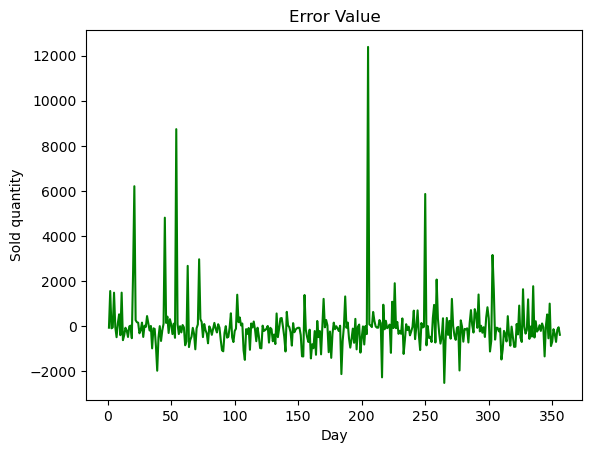

In [186]:
plot_error_value = [i for i in range(1, len(y_test) + 1, 1)]
plt.plot(plot_error_value, y_test-y_pred, color='green', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Sold quantity')
plt.title('Error Value')
plt.show()

### 5. Evaluate Linear Model with Poly nominal features

In [187]:
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  1415302.2459402957
MAE:  582.5604298069323
RMSE:  1189.664761998226


#### **Intecept and coeff of the model**

In [188]:
print('Intercept of the model:',gr_search.best_estimator_.named_steps['linearregression'].intercept_)
print('Coefficient of the line:',gr_search.best_estimator_.named_steps['linearregression'].coef_)

Intercept of the model: 0.0
Coefficient of the line: [ 1.43835370e+03 -1.33509173e+02 -3.24684892e+02  4.03188327e+04
 -3.18818289e+02  2.10011535e+02 -2.84357269e+03  1.14056189e-01
 -5.96191292e+03  2.78165465e+05 -2.28230991e+01 -6.63304620e+01
 -7.13325464e+03  5.22685540e+01  4.44506396e+03  1.60709537e+03
  1.03097296e+02 -4.21472182e+03 -4.25000866e+04 -5.86082850e+03]
